In [1]:
import os
from glob import glob
import numpy as np

# manually comment axes.set_aspect(.74) (line 190) DepricationError in plot_surf.py

from nilearn.plotting import plot_surf
import matplotlib.pyplot as plt
%matplotlib inline

from nilearn.surface import load_surf_data, load_surf_mesh
from nibabel.freesurfer.io import read_geometry

/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from nilearn.surface import load_surf_data, load_surf_mesh
from nibabel.freesurfer.io import read_geometry

def load_concon(path):
    from scipy.sparse import coo_matrix
    data = np.load(path)
    sparse_data = coo_matrix((data['data'], (data['row'], data['col'])))
    adj = sparse_data.todense()
    adjacency_balanced = (adj + adj.T)/2
    np.fill_diagonal(adjacency_balanced, 0)
    return adjacency_balanced

def load_mesh_boris(path='/home/bgutman/datasets/HCP/Dan_iso5.m'):
    
    '''
    load boris mesh (.m) file
    faces enumerated from 1, but after loading from 0
   
    
    usage:
    vertices, faces = load_mesh_boris('/home/bgutman/datasets/HCP/Dan_iso5.m')
    '''
    with open(path, 'r') as f:
        iso5 = f.read()
    iso5 = iso5.split('\n')
    vertices = []
    faces = []
    #ind=[]
    for line in iso5:
        a = line.split(' ')
        if a[0] == 'Vertex':
            vertices.append([float(sym) for sym in a[2:5]])
        elif a[0] == 'Face':
            faces.append([int(sym) for sym in a[2:]])
    vertices = np.array(vertices)
    faces = np.array(faces) - 1
    return vertices, faces

def load_raw_labels_boris(path):
    '''
    load boris labels from .raw format
    labels = load_raw_labels_boris('LH_labels_MajVote.raw')
    '''
    with open(path, 'rb') as f:
        labels = np.fromfile(f, count=-1 ,dtype='float32')
    return labels

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
vertices_fs, faces_fs = read_geometry('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.sphere.reg')
color_fs = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/857263/label/lh.aparc.DKTatlas40.annot')

vertices_fs = vertices_fs / 100
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/Dan_iso5.m')

knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           metric='minkowski')
knn.fit(vertices_fs, color_fs)
color_dan_sphere = knn.predict(vertices)

In [8]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

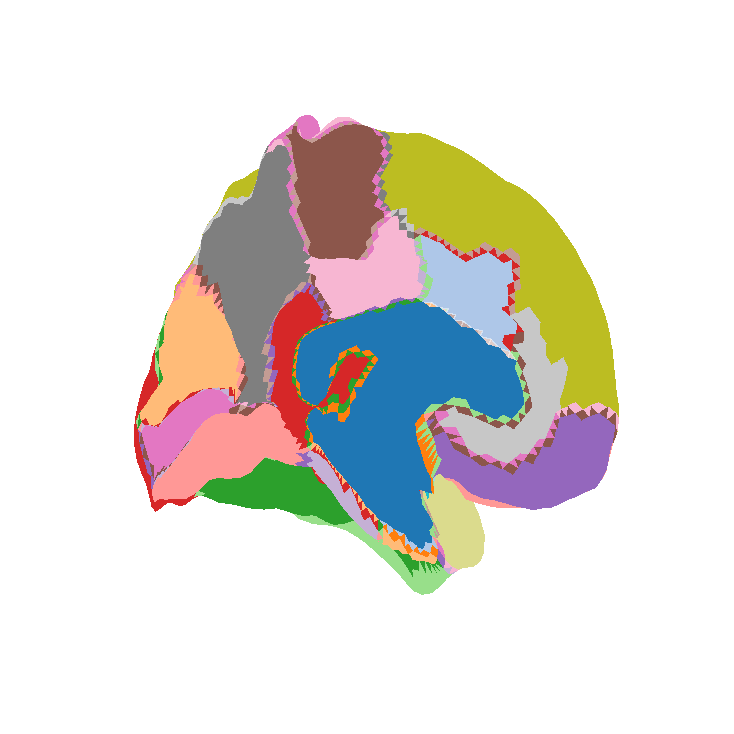

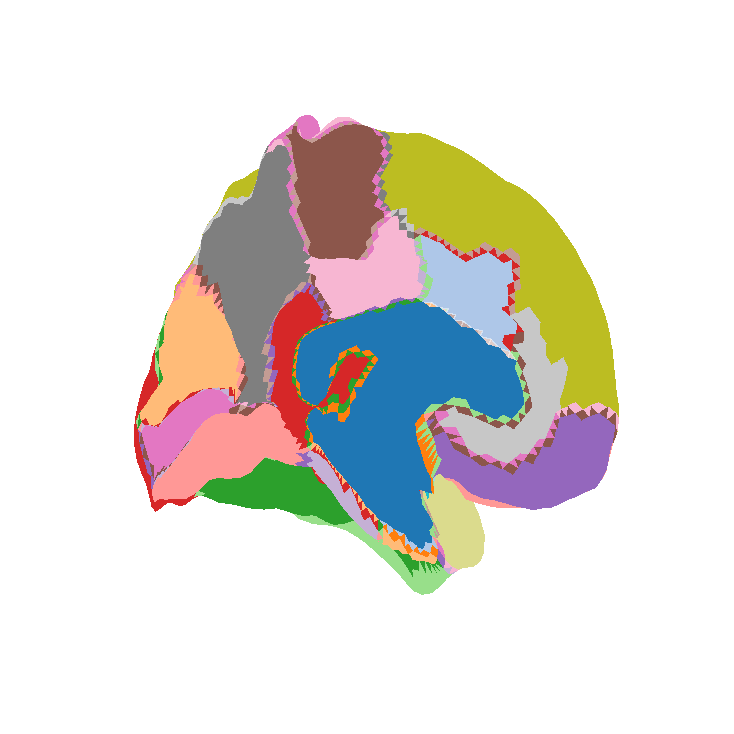

In [9]:
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='medial', surf_map=color_dan_sphere, cmap='tab20')

In [64]:
1.4 * 430 * 5.5

3311.0

In [65]:
data = np.load('/data01/ayagoz/sparse_32_concon_HCP/108828.npz')

In [77]:
q = np.quantile(data['data'], 0.9)

In [70]:
data['data'].shape

(294771052,)

In [93]:
data['row'].astype(np.int16)

array([    0,     0,     0, ..., 20483, 20483, 20483], dtype=int16)

In [98]:
np.array([32000]).astype(np.int16)

array([32000], dtype=int16)

In [90]:
%%timeit
ind = np.where(data['data']>q)
data['data'][ind[0]];

19.4 s ± 219 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%%timeit
data['data'][data['data']>q];

19.3 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
300_000_000 * 64 / 1_000_000_000

19.2

In [116]:
data = np.array([1])
row = np.array([0]).astype(np.int16)
col = np.array([0]).astype(np.int16)
a = coo_matrix((data, (row, col)), shape=(4, 4)).toarray()

In [117]:
a

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [114]:
a.row

array([0], dtype=int32)

In [115]:
data

array([1])

In [147]:
glob('/data01/ayagoz/sparse_32_concon_HCP/*.npz')[:25]

['/data01/ayagoz/sparse_32_concon_HCP/168139.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/141119.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/159138.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/270332.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/308331.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/147030.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/144731.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/194847.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/114823.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/108828.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/211720.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/129937.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/199958.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/320826.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/290136.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/119126.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/164131.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/217429.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/153227.npz',
 '/data01/ayagoz/sparse_32_conc

In [30]:
uid = 141119
adj = load_concon(f'/data01/ayagoz/sparse_32_concon_HCP/{uid}.npz')
adj10 = load_concon(f'/data01/ayagoz/sparse_32_concon_HCP/10/{uid}.npz')
adj30 = load_concon(f'/data01/ayagoz/sparse_32_concon_HCP/70/{uid}.npz')

In [31]:
adj.shape, adj10.shape, adj30.shape

((20484, 20484), (20484, 20484), (20484, 20484))

In [32]:
res = np.nonzero(adj)[0].shape[0]
res10 = np.nonzero(adj10)[0].shape[0]
res30 = np.nonzero(adj30)[0].shape[0]

In [33]:
res10/res, res30/res

(0.8999999782377861, 0.29999999024452484)

In [12]:
data = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/{uid}.npz')
data1 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/10/{uid}.npz')


In [16]:
data['data'].dtype

dtype('float32')

In [15]:
data1['data'].dtype

dtype('float64')

In [27]:
arr = np.random.rand(1000_000)

In [28]:
%%timeit
sparsity = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
quantiles = np.quantile(arr, sparsity/100)

28 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
sparsity = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
for s in sparsity:
    q = np.quantile(arr, s/100)

108 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
quantiles

array([0.10022777, 0.19945598, 0.29937406, 0.39842695, 0.49971282,
       0.59982521, 0.69965396, 0.80227269, 0.90146475])

In [ ]:
8:34

In [156]:
val = np.percentile(adj, 0.1)

In [157]:
val

0.0

In [164]:
glob('/data01/ayagoz/sparse_32_concon_HCP/*.npz')[:25]

['/data01/ayagoz/sparse_32_concon_HCP/168139.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/141119.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/159138.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/270332.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/308331.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/147030.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/144731.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/194847.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/114823.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/108828.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/211720.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/129937.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/199958.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/320826.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/290136.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/119126.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/164131.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/217429.npz',
 '/data01/ayagoz/sparse_32_concon_HCP/153227.npz',
 '/data01/ayagoz/sparse_32_conc

In [34]:
sparsity = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [40]:
a = list(range(10))

In [48]:
a[5:9]

[5, 6, 7, 8]

In [49]:
glob('/home/kurmukov/connective_parcellation/*.tw')

['/home/kurmukov/connective_parcellation/a.tw']

# Apply FS parcellation to ConCon

Apply precomputed parcellations (DKT, Desikan, Destriuex, all laussanne's) to every thresholding

In [121]:
lh_labels = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/178849/label/rh.aparc.a2009s.annot')

In [122]:
np.unique(lh_labels,return_counts=True)[0]

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int32)

lh.aparc.a2009s.annot 74 * 2

lh.BA.annot 14 * 2

lh.aparc.annot  34 * 2

lh.BA.thresh.annot 13 * 2

lh.aparc.DKTatlas40.annot 31 * 2

lh.myaparc_125.annot

In [123]:
def transfer_mesh_color(subject_id,
                        atlas='aparc',
                        reconall_folder='/data01/ayagoz/HCP_1200/FS_reconall/',
                        concon_mesh='/home/kurmukov/HCP/Dan_iso5.m'):
    '''
    Transfer mesh labels from subject sphere mesh, to concon sphere mesh
    
    Parameters:
    
    subject_id - int,
     subject id
     
    atlas - str,
     atlas to transfer, possible values: aparc (Desikan-Killiany), aparc.a2009s (Destrieux Atlas).
     Defined by free surfer https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation
     
    reconall_folder - str,
     path to recon-all FS output
     
    concon_mesh - str,
     path to ConCon sphere mesh
    '''

    lh_vertices, _ = read_geometry(f'{reconall_folder}{subject_id}/surf/lh.sphere.reg')
    rh_vertices, _ = read_geometry(f'{reconall_folder}{subject_id}/surf/rh.sphere.reg')

    lh_labels = load_surf_data(f'{reconall_folder}{subject_id}/label/lh.{atlas}.annot')
    rh_labels = load_surf_data(f'{reconall_folder}{subject_id}/label/rh.{atlas}.annot')
    
    lh_vertices /= 100
    rh_vertices /= 100
    
    lh_vertices_CC, _ = load_mesh_boris(concon_mesh)
    rh_vertices_CC, _ = load_mesh_boris(concon_mesh)
    
    knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           metric='minkowski')
    
    knn.fit(lh_vertices, lh_labels)
    lh_labels_CC = knn.predict(lh_vertices_CC)
    
    knn.fit(rh_vertices, rh_labels)
    rh_labels_CC = knn.predict(rh_vertices_CC)
    
    rh_labels_CC[rh_labels_CC != -1] += np.max(lh_labels_CC)
    
    labels_CC = np.concatenate([lh_labels_CC, rh_labels_CC])

    return labels_CC

In [124]:
lab = transfer_mesh_color(178849)

In [125]:
lab

array([28, -1, 28, ..., 46, 46, 46], dtype=int32)

In [127]:
np.unique(lab).shape[0]- 1

68

In [129]:
import os
len(os.listdir('/data01/ayagoz/HCP_1200/FS_reconall/'))

1113

In [133]:
labels_desikan = []
labels_destriux = []
for sid in sorted(os.listdir('/data01/ayagoz/HCP_1200/FS_reconall/')):
    l1 = transfer_mesh_color(sid)
    labels_desikan.append(l1)
    
    l2 = transfer_mesh_color(sid, atlas='aparc.a2009s')
    labels_destriux.append(l2)
    
    print(sid, np.unique(l1).shape[0]- 1, np.unique(l2).shape[0]- 1)

100206 68 148
100307 68 148
100408 68 148
100610 68 148
101006 68 148
101107 68 148
101309 68 148
101410 68 148
101915 68 148
102008 68 148
102109 68 148
102311 68 148
102513 68 148
102614 68 148
102715 68 148
102816 68 148
103010 68 148
103111 68 148
103212 68 148
103414 68 148
103515 68 148
103818 68 148
104012 68 148
104416 68 148
104820 68 148
105014 68 148
105115 68 148
105216 68 148
105620 68 148
105923 68 148
106016 68 148
106319 68 148
106521 68 148
106824 68 148
107018 68 148
107220 68 148
107321 68 148
107422 68 148
107725 68 148
108020 68 148
108121 68 148
108222 68 148
108323 68 148
108525 68 148
108828 68 148
109123 68 148
109325 68 148
109830 68 148
110007 68 148
110411 68 148
110613 68 148
111009 68 148
111211 68 148
111312 68 148
111413 68 148
111514 68 148
111716 68 148
112112 68 148
112314 68 148
112516 68 148
112819 68 148
112920 68 148
113215 68 148
113316 68 148
113417 68 148
113619 68 148
113821 68 148
113922 68 148
114116 68 148
114217 68 148
114318 68 148
114419

KeyboardInterrupt: 

In [ ]:
all_subjects = os.listdir('/data01/ayagoz/sparse_32_concon_HCP/ConCon_resolution/10')
for subject in all_subjects:
    apply_parcellation(subject)

In [168]:
np.unique(labels_destrieux)

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150], dtype=int32)

In [169]:
adj = np.load('/data01/ayagoz/sparse_32_concon_HCP/Desikan_aparc_resolution/10/180836.npy', allow_pickle=True)
adj = np.load('/data01/ayagoz/sparse_32_concon_HCP/Destrieux_aparc2009_resolution/10/180836.npy', allow_pickle=True)

In [170]:
adj

array([[    0.        ,  4266.51594996,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [ 4266.51594996,     0.        ,     0.        , ...,
           13.95284688,    25.48431277,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,    13.95284688,     0.        , ...,
            0.        , 11285.17983019,   263.30569494],
       [    0.        ,    25.48431277,     0.        , ...,
        11285.17983019,     0.        ,  1440.59412181],
       [    0.        ,     0.        ,     0.        , ...,
          263.30569494,  1440.59412181,     0.        ]])

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

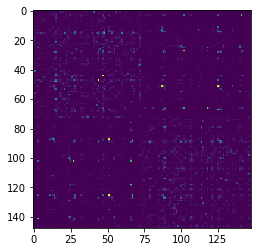

In [172]:
plt.imshow(adj)

In [173]:
adj.shape

(148, 148)

In [156]:
import networkx as nx

In [174]:
g = nx.from_numpy_matrix(adj)

In [175]:
for comp in nx.connected_components(g):
    print(comp)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147}


In [180]:
np.nonzero(adj)[0].shape[0] / 2

6015.0

In [181]:
148*147/2

10878.0

In [197]:
!ls /data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc

desikan_aparc  destrieux_aparc2009


In [198]:
os.listdir('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc')

['473952.npy',
 '701535.npy',
 '116524.npy',
 '170631.npy',
 '207628.npy',
 '156031.npy',
 '165941.npy',
 '188751.npy',
 '101410.npy',
 '172130.npy',
 '238033.npy',
 '321323.npy',
 '214524.npy',
 '193441.npy',
 '180432.npy',
 '214625.npy',
 '130114.npy',
 '926862.npy',
 '497865.npy',
 '334635.npy',
 '467351.npy',
 '614439.npy',
 '280739.npy',
 '199655.npy',
 '158136.npy',
 '693764.npy',
 '145632.npy',
 '117021.npy',
 '725751.npy',
 '733548.npy',
 '217126.npy',
 '912447.npy',
 '454140.npy',
 '616645.npy',
 '134021.npy',
 '169343.npy',
 '419239.npy',
 '125525.npy',
 '193845.npy',
 '822244.npy',
 '147030.npy',
 '286347.npy',
 '208327.npy',
 '211922.npy',
 '173738.npy',
 '943862.npy',
 '131217.npy',
 '401422.npy',
 '113619.npy',
 '200210.npy',
 '734247.npy',
 '199150.npy',
 '662551.npy',
 '128935.npy',
 '180836.npy',
 '107321.npy',
 '202113.npy',
 '103818.npy',
 '171128.npy',
 '163836.npy',
 '289555.npy',
 '102513.npy',
 '917558.npy',
 '134627.npy',
 '366446.npy',
 '151728.npy',
 '715950.n

In [200]:
l1 =np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc/473952.npy', allow_pickle=True)
l2 =np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009/473952.npy', allow_pickle=True)

In [210]:
ind1 = set(np.where(l1 == -1)[0])
ind2 = set(np.where(l2 == -1)[0])

In [213]:
ind1.symmetric_difference(ind2)

{564, 8997, 15972, 18469, 18499}

In [214]:
len(ind2)

1596

In [215]:
from glob import glob

In [ ]:
def create_average_parcellation(labels):
    '''
    Creates average parcellation from set of labels,
    for every vertex chooses most frequent label.
    
    Parameters
    -----
    
    labels - ndarray,
     N x M array, N subject, M number of mesh vertices to label
     
    Returns
    -----
    average_label - ndarray,
     array of labels of length M
    '''
    n, m = labels.shape
    average_labels = np.zeros(m)
    for i in tqdm(range(m)):
        vals, freq = np.unique(labels[:, i], return_counts=True)
        ind = np.argmax(freq)
        average_labels[i] = vals[ind]
    return average_labels

In [256]:
labels = []
files = glob('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc/*.npy')
for file in tqdm(files):
    label = np.load(file, allow_pickle=True)
    labels.append(label)
labels= np.array(labels)

100%|██████████| 1113/1113 [00:00<00:00, 3085.06it/s]


In [257]:
aver_labels = create_average_parcellation(labels)

100%|██████████| 20484/20484 [00:00<00:00, 27044.59it/s]


In [258]:
aver_labels

array([28., -1., 28., ..., 46., 46., 46.])

In [259]:
np.save('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy', aver_labels)

In [244]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, accuracy_score

In [239]:
mask = aver_labels != -1
masked_aver_labels = aver_labels[mask]

In [240]:
ami = []

for label in tqdm(labels):
    ami.append(adjusted_mutual_info_score(label[mask], masked_aver_labels))
ami = np.array(ami)

  0%|          | 0/1113 [00:00<?, ?it/s]/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
100%|██████████| 1113/1113 [02:24<00:00,  7.77it/s]


In [241]:
# 0.95 +- 0.01
ami.mean(), ami.std()

(0.9636800027876066, 0.0019995701967319354)

In [242]:
ari = []
for label in tqdm(labels):
    ari.append(adjusted_rand_score(label[mask], masked_aver_labels))
ari = np.array(ari)

100%|██████████| 1113/1113 [00:04<00:00, 270.66it/s]


In [243]:
# 0.947 +- 0.01
ari.mean(), ari.std()

(0.9594793622722885, 0.002591483903831296)

In [245]:
acc = []
for label in tqdm(labels):
    acc.append(accuracy_score(label[mask], masked_aver_labels))
acc = np.array(acc)

100%|██████████| 1113/1113 [00:01<00:00, 835.85it/s]


In [246]:
acc.mean(), acc.std()

(0.9746943471841154, 0.0018351420497114456)

In [247]:
label.shape

(20484,)

In [250]:
ami_hsym = []
for label in tqdm(labels):
    ami_hsym.append(adjusted_mutual_info_score(label[:10242], label[10242:]))
ami_hsym = np.array(ami_hsym)
print(ami_hsym.mean(), ami_hsym.std())

0.6410902953500015 0.0018146694481806056


In [251]:
labels_2 = []
files = glob('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009/*.npy')
for file in tqdm(files):
    label = np.load(file, allow_pickle=True)
    labels_2.append(label)
labels_2= np.array(labels_2)

100%|██████████| 1113/1113 [00:01<00:00, 865.35it/s]


In [254]:
ami_hsym = []
for label in tqdm(labels_2):
    ami_hsym.append(adjusted_mutual_info_score(label[:10242], label[10242:]))
ami_hsym = np.array(ami_hsym)
print(ami_hsym.mean(), ami_hsym.std())

  0%|          | 0/1113 [00:00<?, ?it/s]/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
100%|██████████| 1113/1113 [01:37<00:00, 11.47it/s]

0.6343968790756607 0.002647323753997257


In [1]:
[i 
 for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [59]:
import os

In [64]:
all_subjects = set([uid.split('.')[0] for uid in os.listdir('/data01/ayagoz/sparse_32_concon_HCP/ConCon_resolution/10')])
done = set([uid.split('.')[0] for uid in os.listdir('/data01/ayagoz/sparse_32_concon_HCP/parcellations/connectivity_parcellation_level2/100')])

In [65]:
d = all_subjects.difference(done)
len(all_subjects.difference(done))

50

In [66]:
all_subjects = [uid.split('.')[0] for uid in os.listdir('/data01/ayagoz/sparse_32_concon_HCP/ConCon_resolution/10')]

In [67]:
for i in range(0, 450, 50):
    temp = d.intersection(set(all_subjects[i: i+50]))
    print(i, len(temp), temp)

0 0 set()
50 50 {'201111', '186141', '162329', '322224', '138231', '154431', '159441', '192843', '136833', '156536', '311320', '166438', '187345', '212419', '268749', '118023', '310621', '154835', '167036', '130821', '198451', '135528', '200210', '280739', '223929', '107018', '188448', '127630', '285345', '202719', '150726', '179548', '246133', '173738', '169444', '268850', '182739', '107725', '164939', '201414', '117930', '105014', '209127', '161327', '140925', '165638', '199453', '112314', '165032', '123420'}
100 0 set()
150 0 set()
200 0 set()
250 0 set()
300 0 set()
350 0 set()
400 0 set()


In [39]:
for i in range(0, 450, 50):
    temp = d.intersection(set(all_subjects[i: i+50]))
    print(i, len(temp), temp)

0 0 set()
50 35 {'201111', '186141', '162329', '154431', '159441', '136833', '156536', '311320', '268749', '118023', '310621', '198451', '167036', '130821', '135528', '200210', '280739', '188448', '127630', '285345', '202719', '150726', '179548', '246133', '169444', '182739', '107725', '164939', '201414', '161327', '140925', '165638', '112314', '165032', '123420'}
100 0 set()
150 4 {'316633', '151829', '176542', '139839'}
200 0 set()
250 0 set()
300 0 set()
350 4 {'156031', '201515', '177342', '102513'}
400 0 set()


In [48]:
d.intersection(set(all_subjects[50: 100]))

{'107725',
 '112314',
 '118023',
 '123420',
 '127630',
 '130821',
 '135528',
 '136833',
 '140925',
 '150726',
 '154431',
 '156536',
 '159441',
 '161327',
 '162329',
 '164939',
 '165032',
 '165638',
 '167036',
 '169444',
 '179548',
 '182739',
 '186141',
 '188448',
 '198451',
 '200210',
 '201111',
 '201414',
 '202719',
 '246133',
 '268749',
 '280739',
 '285345',
 '310621',
 '311320'}

In [16]:
for i in range(0, 450, 50):
    print(i, d.intersection(set(all_subjects[i: i+50])))

0 set()
50 {'201111', '186141', '162329', '154431', '159441', '136833', '156536', '311320', '268749', '118023', '310621', '198451', '167036', '130821', '135528', '200210', '280739', '188448', '127630', '285345', '202719', '150726', '179548', '246133', '169444', '182739', '107725', '164939', '201414', '161327', '140925', '165638', '112314', '165032', '123420'}
100 set()
150 {'176542', '316633', '151829', '109830', '139839'}
200 set()
250 set()
300 set()
350 {'156031', '102513', '201515', '204016', '177342'}
400 set()


In [53]:
import numpy as np

In [54]:
from glob import glob

In [56]:
for i,p in enumerate(glob('/data01/ayagoz/sparse_32_concon_HCP/parcellations/connectivity_parcellation_level3/10/*.npy')):
    partition = np.load(p, allow_pickle=True)
    print(i,np.unique(partition))

0 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101]
1 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97]
2 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 8

127 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95]
128 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
129 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97]
130 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22 

253 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
254 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
255 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 8

375 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
376 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101]
377 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67 

In [58]:
np.unique(partition, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  2,  45, 172, 217, 162,  82,  79, 181, 263, 235, 198,  56,  83,
        144, 254,  74,  60, 201,  80, 217, 459, 317, 293, 109, 207, 428,
        178, 182, 168, 172, 169, 153, 207, 182, 128,  93, 199, 213, 145,
         65, 266, 358, 206,  88, 255, 193, 265, 133, 147, 228, 332, 117,
        398, 331, 103, 343, 276, 102, 122, 187, 118,  82,  92,  90, 133,
        223, 132, 166, 109,  80, 330, 199,  89, 150, 322, 3

In [70]:
from joblib import Parallel, delayed, parallel_backend

In [89]:
%%timeit
with parallel_backend(backend='threading', n_jobs=2):
    a = Parallel()(delayed(lambda x: x**2) (i) for i in range(1000))

101 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
%%timeit
with parallel_backend(backend='threading', n_jobs=1):
    a = Parallel()(delayed(lambda x: x**2) (i) for i in range(1000))

15 ms ± 75.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%%timeit
(i**2 for i in range(1000))

486 ns ± 0.943 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [77]:
with parallel_backend('threading', n_jobs=2):
    Parallel()(delayed(lambda x: x**2)(i ** 2) for i in range(10))

In [ ]:
Parallel(n_jobs=10)(delayed(get_partitions_at_levels)(subject,
                                                          average_desikan) for subject in tqdm(all_subjects[start:end]))

In [6]:
4 * 25 * 10

1000

In [9]:

s = 0
for i in range(10):
    s += 25 * 0.125 * (i+1)

In [10]:
s

171.875

In [1]:
import os
import numpy as np
from tqdm import tqdm
from sys import argv
from joblib import Parallel, delayed
from scipy.sparse import coo_matrix

def load_concon(path, labels_to_drop=None):
    '''
    Load ConCon ajancency matrix
    
    Parameters
    -------
    
    path - str,
     path to concon *.npz file
     
    labels_to_drop - ndarray,
     default None, drops rows/columns which
     corresponds to label "-1" (corpus collosum, cerebellum)
     
    Return
    -------
    
    adjacency matrix
    '''

    data = np.load(path)
    sparse_data = coo_matrix((data['data'], (data['row'], data['col'])))
    adj = sparse_data.todense()
    adjacency_balanced = (adj + adj.T) / 2
    np.fill_diagonal(adjacency_balanced, 0)

    if labels_to_drop is not None:
        mask = labels_to_drop != -1
        adjacency_balanced = adjacency_balanced[mask, :][:, mask]
    return adjacency_balanced


def squeeze_matrix(matrix,
                   labels,
                   drop_minus_1 = False,
                   fill_diag_zero=True,
                   return_transform=False,):
    '''
    Apply parcellation to adjacency matrix
    
    Parameters
    ----
    
    matrix - ndarray,
     graph adjacency matrix M x M
     
    labels - ndarray,
     parcellation labels 1 x M with N unique values
     (cluster/parcels labels)
     
    drop_minus_1 - bool,
     default True, drops rows/columns which
     corresponds to label "-1"
    
    fill_diag_zero - bool,
     default, True, fills diagonal of the
     returned adjacency matrix with zeros    
              
    return_transform - bool,
     default False
    '''
    if drop_minus_1:
        mask = labels != -1
        labels = labels[mask]
        matrix = matrix[mask, :][:, mask]

    input_size = matrix.shape[0]
    output_size = np.unique(labels).shape[0]
    
    d = dict(zip(np.unique(labels), np.arange(output_size)))
    _labels = list(map(lambda x: d[x], labels))
    transform = np.zeros((input_size, output_size))
    
    for row, col in enumerate(_labels):
        transform[row, col] = 1
    
    squeezed = transform.T.dot(matrix.dot(transform))
    squeezed = (squeezed + squeezed.T)/2
    
    if fill_diag_zero:
        np.fill_diagonal(squeezed, 0)
    
    if return_transform:
        return np.array(squeezed), transform
    
    return np.array(squeezed)

def apply_parcellation(subject,
                       parcellation_folder, 
                       source_folder,
                       target_folder):
    '''
    Applies parcellation for all sparsity levels
    
    Parameters
    ------
    
    subject - int,
     subject id
     
    parcellation_folder - str,
     folder with labels to apply
     
    source_folder - str,
     folder with concon sparsity folders
     
    target_folder - str,
     folder to save to
    '''
    plevel = parcellation_folder[-1]
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy',
                   allow_pickle=True)
    
    for sparsity in range(10, 101, 10):
        try:
            adj = load_concon(f'{source_folder}/{sparsity}/{subject}.npz', labels_to_drop=average_desikan)
            labels_parcellation = np.load(f'{parcellation_folder}/{sparsity}/ensemble_{plevel}_{sparsity}.npy')
            adj_parcellation = squeeze_matrix(adj, labels_parcellation)
            np.save(f'{target_folder}/{sparsity}/{subject}.npy', adj_parcellation)
        except BaseException as e:
            print(e, subject, sparsity, plevel)


if __name__ == "__main__":
    
    plevel = argv[1] # parcellation level: 1,2,3

    concon_folder = '/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution'
    parcellation_folder = f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level{plevel}'
    parcellation_target_folder = f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level{plevel}'
    all_subjects = [uid.split('.')[0] for uid in os.listdir(f'{concon_folder}/10')]

    Parallel(n_jobs=25)(delayed(apply_parcellation)(subject,
                                                   parcellation_folder,
                                                   concon_folder,
                                                   parcellation_target_folder) for subject in tqdm(all_subjects))
    
    

In [31]:
plevel = 1

concon_folder = '/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution'
parcellation_folder = f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level{plevel}'
parcellation_target_folder = f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level{plevel}'
all_subjects = [uid.split('.')[0] for uid in os.listdir(f'{concon_folder}/10')]

In [32]:
os.listdir(parcellation_folder)

['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']

In [41]:
parcellation_target_folder

'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level1'

In [33]:
subject = all_subjects[0]

In [34]:
apply_parcellation(subject,
                   parcellation_folder,
                   concon_folder,
                   parcellation_target_folder)

KeyboardInterrupt: 

In [35]:
l =  np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level1/100/ensemble_1_100.npy')

In [36]:

np.unique(l, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([4217,    1, 2669, 2113,    1, 3587, 3243, 3038]))

In [37]:
l.shape

(18869,)

In [39]:
adj = load_concon('/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution/10/180836.npz', average_desikan)

In [40]:
adj.shape

(18869, 18869)

In [2]:
adj = np.load('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level1/10/180836.npy')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

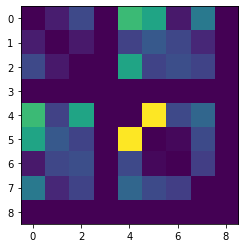

In [5]:
plt.imshow(adj)

In [1]:
'''
Create sparser concons: 10% edges, ... 90% edges
Sparser concons saved to folders: 90% edges to folder /90, 80% edges to folder /80, etc.
'''
import sys
import numpy as np    
from glob import glob
from joblib import Parallel, delayed
from tqdm import tqdm


def save(path, arr, row, col):
    from scipy.sparse import coo_matrix, save_npz
    sparse_data = coo_matrix((arr, (row, col)), dtype=np.float32, shape=(20484, 20484))
    save_npz(path, sparse_data)

def sparsify(path):
    data = np.load(path)
    arr = data['data'].astype(np.float32)
    sparsity = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
    quantiles = np.quantile(arr, sparsity/100)
    for q, sparsity in zip(quantiles, sparsity):
        new_path = f'/data01/ayagoz/sparse_32_concon_HCP/{100-sparsity}/{path.split("/")[-1]}'
        mask = arr > q
        sparsified_arr = arr[mask]
        row = data['row'][mask] # max index is 20_483, doesnt actually save as 16
        col = data['col'][mask]
        save(new_path, sparsified_arr, row, col)

# # file = glob('/data01/ayagoz/sparse_32_concon_HCP/*.npz')[0]
# # sparsify(file)
# # Parallel(n_jobs=20)(delayed(sparsify)(file) for file in tqdm(glob('/data01/ayagoz/sparse_32_concon_HCP/*.npz')))
# if __name__=='__main__':
#     start = int(sys.argv[1])
#     end = int(sys.argv[2])
#     Parallel(n_jobs=20)(delayed(sparsify)(file) for file in tqdm(glob('/data01/ayagoz/sparse_32_concon_HCP/*.npz')[start:end]))

In [7]:
file = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution/100/*.npz')[0]

In [8]:
file

'/data01/ayagoz/sparse_32_concon_HCP/connectomes/ConCon_resolution/100/100307.npz'

In [71]:
data = np.load(file)
arr = data['data'].astype(np.float32)

In [105]:
quantiles = np.quantile(arr, 95/100)

In [106]:
mask = arr > quantiles
sparsified_arr = arr[mask]
row = data['row'][mask] # max index is 20_483, doesnt actually save as 16
col = data['col'][mask]

In [107]:

quantiles

2.7920759320259094

In [108]:
from scipy.sparse import coo_matrix, save_npz

In [109]:
adj = coo_matrix((sparsified_arr, (row, col)), dtype=np.float32, shape=(20484, 20484)).todense()

In [110]:
adj.shape

(20484, 20484)

In [111]:
from igraph import Graph
from igraph import ADJ_MAX

In [112]:
average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy',
                   allow_pickle=True)

In [113]:
np.unique(average_desikan)

array([-1.,  1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70.])

In [114]:
idx = average_desikan != -1

adj1 = adj[idx, :][:, idx]

In [115]:
adj1.shape

(18869, 18869)

In [116]:
graph = Graph.Weighted_Adjacency(adj1.tolist(), mode=ADJ_MAX, attr='weight')

In [117]:
res = graph.components()

In [118]:
a = res.membership

In [119]:
x, y = np.unique(a, return_counts=True)

In [120]:
y

array([18831,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1])

In [121]:
np.sort(y)[-100:]

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1, 18831])

In [122]:
from scipy.spatial.distance import squareform

In [123]:
edges = squareform(adj1)

In [124]:
edges.shape

(178010146,)

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

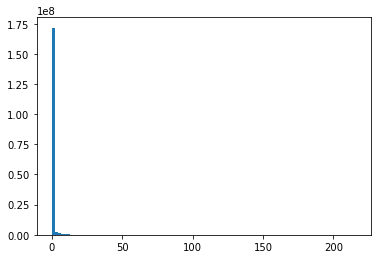

In [126]:
bins = plt.hist(edges, bins=100)

In [127]:
counts, val, _ = bins

In [41]:
val.shape

(101,)

In [42]:
counts.shape

(100,)

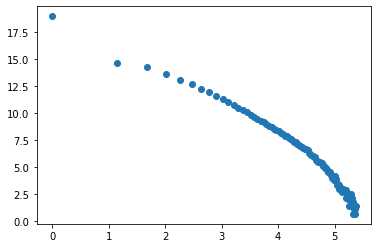

In [128]:
plt.scatter(np.log1p(val[:-1]), np.log1p(counts))

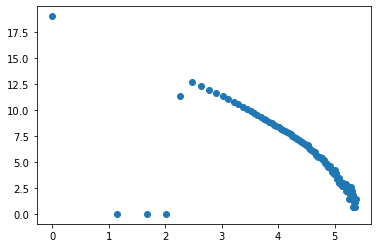

In [96]:
plt.scatter(np.log1p(val[:-1]), np.log1p(counts))

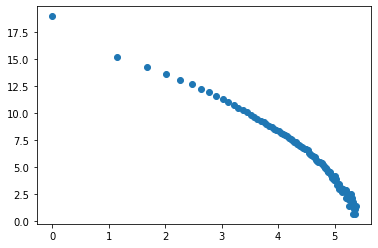

In [44]:
plt.scatter(np.log1p(val[:-1]), np.log1p(counts))

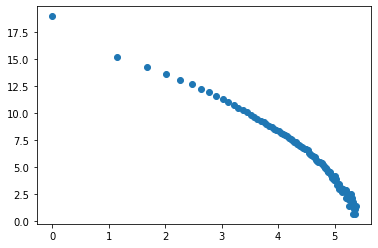

In [62]:
plt.scatter(np.log1p(val[:-1]), np.log1p(counts))

In [65]:
i = np.nonzero(edges)[0]

In [66]:
non_zero_edges = edges[i]

In [67]:
non_zero_edges.shape

(119355993,)

In [70]:
119355993 / (20_000*19_999/2)

0.5968098054902745